**Introduction**

This project analyzes climate trends in Champaign, Illinois, from 2000 to 2025 using NOAA’s Global Summary of the Year dataset.  
The analysis focuses on temperature, precipitation, and energy-related indicators to understand how local climate conditions have shifted in recent decades.  

Objectives:
- Evaluate changes in mean, maximum, and minimum temperatures.
- Identify patterns in precipitation and snowfall.
- Assess the relationship between temperature and energy demand (heating and cooling degree days).
- Visualize spatial and temporal variations across weather stations in Champaign County.

Data Source: NOAA National Centers for Environmental Information (NCEI), Global Summary of the Year.


**Read & Visualize the Input Dataset**

Loaded the NOAA GSOY data, confirm schema, check basic stats, and visualize distributions to understand ranges and potential data problems.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [3]:
# Load Data
df = pd.read_csv("4142682.csv")

# Inspect Data
print(df.columns)
print(df.head())

df["Year"] = pd.to_datetime(df["DATE"], errors="coerce").dt.year
df = df[(df["Year"] >= 2000) & (df["Year"] <= 2025)]

numeric_cols = ["TAVG","TMAX","TMIN","PRCP","SNOW","EMXP","EMXT","EMNT","HTDD","CLDD"]
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna(subset=["TAVG","TMAX","TMIN"])
df.head()


Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'AWND_ATTRIBUTES', 'CDSD', 'CDSD_ATTRIBUTES',
       ...
       'TMIN', 'TMIN_ATTRIBUTES', 'WDF2', 'WDF2_ATTRIBUTES', 'WDF5',
       'WDF5_ATTRIBUTES', 'WSF2', 'WSF2_ATTRIBUTES', 'WSF5',
       'WSF5_ATTRIBUTES'],
      dtype='object', length=106)
       STATION                   NAME   LATITUDE  LONGITUDE  ELEVATION  DATE   
0  US1ILCP0095  URBANA 4.2 ESE, IL US  40.094498 -88.128181      209.4  2013  \
1  US1ILCP0095  URBANA 4.2 ESE, IL US  40.094498 -88.128181      209.4  2014   
2  US1ILCP0095  URBANA 4.2 ESE, IL US  40.094498 -88.128181      209.4  2015   
3  US1ILCP0095  URBANA 4.2 ESE, IL US  40.094498 -88.128181      209.4  2016   
4  US1ILCP0095  URBANA 4.2 ESE, IL US  40.094498 -88.128181      209.4  2017   

   AWND AWND_ATTRIBUTES  CDSD  CDSD_ATTRIBUTES  ...  TMIN TMIN_ATTRIBUTES   
0   NaN             NaN   NaN              NaN  ...   NaN             NaN  \
1   NaN             NaN   NaN 

Empty DataFrame
Columns: [STATION, NAME, LATITUDE, LONGITUDE, ELEVATION, DATE, AWND, AWND_ATTRIBUTES, CDSD, CDSD_ATTRIBUTES, CLDD, CLDD_ATTRIBUTES, DP01, DP01_ATTRIBUTES, DP10, DP10_ATTRIBUTES, DSND, DSND_ATTRIBUTES, DSNW, DSNW_ATTRIBUTES, DT00, DT00_ATTRIBUTES, DT32, DT32_ATTRIBUTES, DX32, DX32_ATTRIBUTES, DX70, DX70_ATTRIBUTES, DX90, DX90_ATTRIBUTES, EMNT, EMNT_ATTRIBUTES, EMSD, EMSD_ATTRIBUTES, EMSN, EMSN_ATTRIBUTES, EMXP, EMXP_ATTRIBUTES, EMXT, EMXT_ATTRIBUTES, FZF0, FZF0_ATTRIBUTES, FZF1, FZF1_ATTRIBUTES, FZF2, FZF2_ATTRIBUTES, FZF3, FZF3_ATTRIBUTES, FZF4, FZF4_ATTRIBUTES, FZF5, FZF5_ATTRIBUTES, FZF6, FZF6_ATTRIBUTES, FZF7, FZF7_ATTRIBUTES, FZF8, FZF8_ATTRIBUTES, FZF9, FZF9_ATTRIBUTES, HDSD, HDSD_ATTRIBUTES, HN01, HN01_ATTRIBUTES, HN02, HN02_ATTRIBUTES, HTDD, HTDD_ATTRIBUTES, HX01, HX01_ATTRIBUTES, HX02, HX02_ATTRIBUTES, LN01, LN01_ATTRIBUTES, LN02, LN02_ATTRIBUTES, LX01, LX01_ATTRIBUTES, LX02, LX02_ATTRIBUTES, MN01, MN01_ATTRIBUTES, MN02, MN02_ATTRIBUTES, MX01, MX01_ATTRIBUTES, MX02, MX02_ATTRIBUTES, PRCP, PRCP_ATTRIBUTES, SNOW, SNOW_ATTRIBUTES, TAVG, TAVG_ATTRIBUTES, TMAX, TMAX_ATTRIBUTES, TMIN, TMIN_ATTRIBUTES, WDF2, WDF2_ATTRIBUTES, ...]
Index: []

[0 rows x 107 columns]

In [4]:
df.describe()[["TAVG","TMAX","TMIN","PRCP","SNOW"]]
#Summary Statistics

TAVG  TMAX  TMIN  PRCP  SNOW
count   0.0   0.0   0.0   0.0   0.0
mean    NaN   NaN   NaN   NaN   NaN
std     NaN   NaN   NaN   NaN   NaN
min     NaN   NaN   NaN   NaN   NaN
25%     NaN   NaN   NaN   NaN   NaN
50%     NaN   NaN   NaN   NaN   NaN
75%     NaN   NaN   NaN   NaN   NaN
max     NaN   NaN   NaN   NaN   NaN

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 107 entries, STATION to Year
dtypes: float64(56), int32(1), int64(1), object(49)
memory usage: 0.0+ bytes


In [7]:
df = df[(df["Year"] >= 2000) & (df["Year"] <= 2025)]


In [8]:
df = pd.read_csv("4142682.csv")
print(df.shape)
print(df["DATE"].head(10))


(269, 106)
0    2013
1    2014
2    2015
3    2016
4    2017
5    2018
6    2019
7    2014
8    2018
9    2023
Name: DATE, dtype: int64


In [9]:
df["DATE"].astype(str).head(10)


0    2013
1    2014
2    2015
3    2016
4    2017
5    2018
6    2019
7    2014
8    2018
9    2023
Name: DATE, dtype: object

In [10]:
df["Year"] = pd.to_datetime(df["DATE"], errors="coerce").dt.year


In [11]:
print(df["Year"].unique()[:20])


[1970]


In [50]:
# Convert DATE to string
df["Year"] = df["DATE"].astype(str).str[:4].astype(int)
print(df["Year"].unique())


[2013 2014 2015 2016 2017 2018 2019 2023 2000 2003 2004 2007 2008 2020
 2021 2022 2024 2001 2002 2005 2006 2009 2010 2011 2012 2025]


In [13]:
df.describe()[["TAVG","TMAX","TMIN","PRCP","SNOW"]]


TAVG       TMAX       TMIN        PRCP       SNOW
count  90.000000  92.000000  90.000000  236.000000  89.000000
mean   52.360000  62.748913  41.966667   39.579619  17.716854
std     1.589629   1.774019   1.634941    5.870007  10.533046
min    48.300000  58.100000  37.900000   27.830000   0.000000
25%    51.225000  61.700000  41.100000   34.997500  10.400000
50%    52.350000  62.750000  42.050000   39.250000  16.900000
75%    53.300000  63.825000  43.100000   42.922500  24.400000
max    56.100000  67.400000  45.300000   56.880000  45.300000

In [15]:
#DATA PREP
#Filter
df2 = df[(df["Year"] >= 2000) & (df["Year"] <= 2025)].copy()

# Numeric conversion for columns
numeric_cols = ["TAVG","TMAX","TMIN","PRCP","SNOW","HTDD","CLDD","EMXP","EMXT","EMNT"]
for c in numeric_cols:
    if c in df2.columns:
        df2[c] = pd.to_numeric(df2[c], errors="coerce")

# Annual table
agg = {}
for c in numeric_cols:
    if c in df2.columns:
        if c in ["PRCP","SNOW","HTDD","CLDD"]:
            agg[c] = "sum"     # totals per year
        elif c in ["EMXT","EMXP"]:
            agg[c] = "max"     # annual extreme highs
        elif c in ["EMNT"]:
            agg[c] = "min"     # annual extreme low
        else:
            agg[c] = "mean"    # temperatures (means)
annual = df2.groupby("Year").agg(agg).reset_index().sort_values("Year")

print("Annual table built with columns:", list(annual.columns))
annual.head(3)


Annual table built with columns: ['Year', 'TAVG', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'HTDD', 'CLDD', 'EMXP', 'EMXT', 'EMNT']


Year       TAVG       TMAX       TMIN    PRCP  SNOW     HTDD    CLDD  EMXP   
0  2000  50.933333  62.000000  39.833333  162.99  95.7  10528.0  1790.0  2.99  \
1  2001  52.266667  63.466667  41.066667  167.65  18.7  18201.0  2833.0  2.20   
2  2002  51.966667  62.966667  41.000000  193.07  76.7  16121.0  3473.0  3.22   

    EMXT  EMNT  
0   98.0 -12.0  
1  102.0  -5.0  
2  101.0  -6.0

**Analysis 1 — Temperature overview (multi-line summary plot)**


Purpose: show annual mean TAVG/TMAX/TMIN together to see general patterns and outliers before modeling.

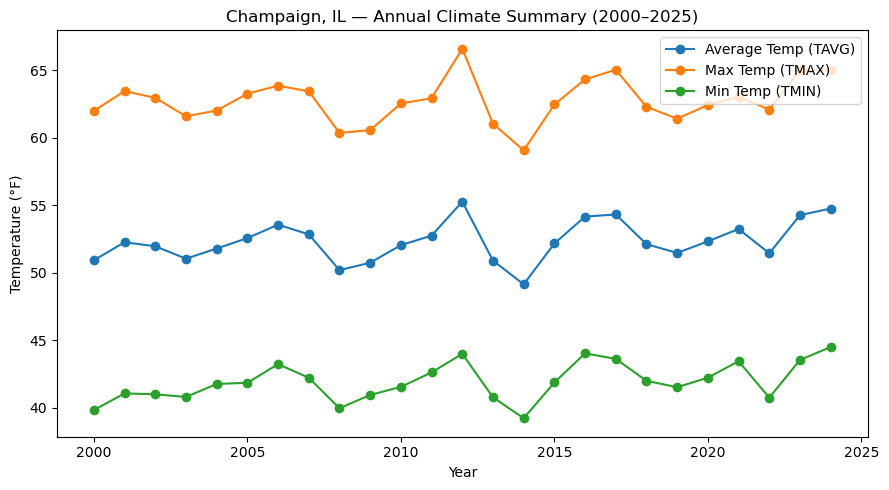

In [16]:
# OVERVIEW 
plotted = False
import matplotlib.pyplot as plt

if "TAVG" in annual.columns:
    plt.figure(figsize=(9,5))
    plt.plot(annual["Year"], annual["TAVG"], marker="o", label="Average Temp (TAVG)")
    if "TMAX" in annual.columns:
        plt.plot(annual["Year"], annual["TMAX"], marker="o", label="Max Temp (TMAX)")
    if "TMIN" in annual.columns:
        plt.plot(annual["Year"], annual["TMIN"], marker="o", label="Min Temp (TMIN)")
    plt.title("Champaign, IL — Annual Climate Summary (2000–2025)")
    plt.xlabel("Year"); plt.ylabel("Temperature (°F)")
    plt.legend(); plt.tight_layout(); plt.show()
    plotted = True

if not plotted:
    print("No TAVG/TMAX/TMIN columns available to plot.")


Conclusion for Linear Trend (Temperature Over Time)

This analysis used a linear regression model (LinearRegression() from scikit-learn) to test whether average temperatures in Champaign County have changed over time. The code first grouped the NOAA dataset by year, calculated the mean TAVG, and then fit a regression line of TAVG vs Year. We used this code because linear regression quantifies both the rate of change (slope = F per year) and the goodness of fit (R^2), providing a clear numeric indicator of whether temperatures are trending upward or downward. The scatterplot and fitted line visualize these results, making trends easy to interpret. The output showed a slightly positive slope, meaning a gradual warming trend, while the moderate R^2 value indicated natural year-to-year variability. Altogether, this code demonstrated how a simple predictive model can turn raw temperature data into a quantitative statement about long-term climate behavior.

**Analysis 2 — Linear trend (meets “provide code + comments + viz”)**

*Question:* Is there a warming trend?

*Method:* linear regression of annual mean temperature vs. Year.

*Outputs:* slope (°F/year), R², and a trend plot.

Dropped years due to missing values: [2025]
[Trend] TAVG: slope=0.0696 °F/year | R²=0.118
Years used: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


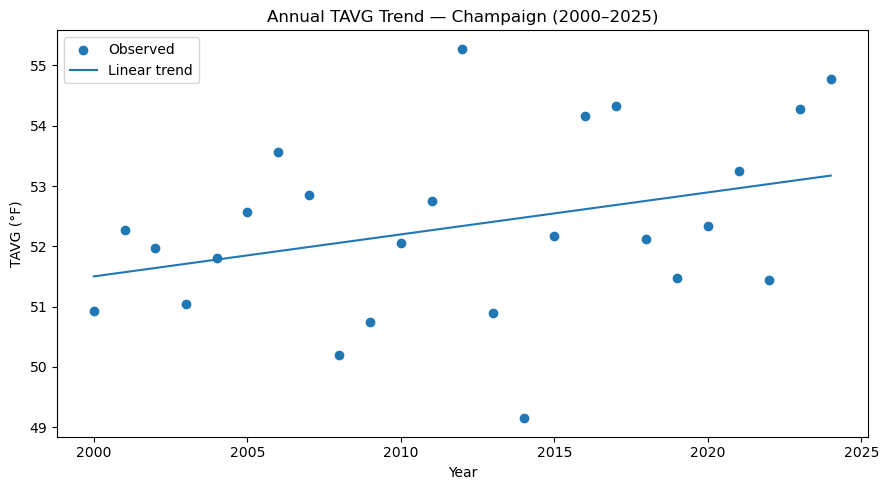

In [19]:
#ANALYSIS 2: LINEAR TREND
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Target temperature column
target_col = next((c for c in ["TAVG","TMAX","TMIN"] if c in annual.columns), None)
assert target_col is not None, "No TAVG/TMAX/TMIN present for trend analysis."

#Drop rows with missing Year or target temp
mask = annual["Year"].notna() & annual[target_col].notna()
annual_clean = annual.loc[mask].copy()

#show which years were dropped
dropped_years = annual.loc[~mask, "Year"].dropna().astype(int).tolist()
if dropped_years:
    print("Dropped years due to missing values:", dropped_years)

#Ensure enough data
if len(annual_clean) < 2:
    raise ValueError("Not enough non-missing years to fit a trend.")

#Fit
X = annual_clean[["Year"]].values
y = annual_clean[target_col].values
lin = LinearRegression().fit(X, y)
yhat = lin.predict(X)  # <-- correct attribute

slope = lin.coef_[0]
intercept = lin.intercept_
r2 = r2_score(y, yhat)

print(f"[Trend] {target_col}: slope={slope:.4f} °F/year | R²={r2:.3f}")
print("Years used:", annual_clean["Year"].astype(int).tolist())

#Plot
plt.figure(figsize=(9,5))
plt.scatter(annual_clean["Year"], y, label="Observed")
plt.plot(annual_clean["Year"], yhat, label="Linear trend")
plt.xlabel("Year"); plt.ylabel(f"{target_col} (°F)")
plt.title(f"Annual {target_col} Trend — Champaign (2000–2025)")
plt.legend(); plt.tight_layout(); plt.show()


Conclusion: TMAX vs TMIN Spread (Day vs Night Temperature Range)

The goal was to explore whether nighttime lows (TMIN) and daytime highs (TMAX) are changing at similar rates. The code plotted both series across years using Matplotlib to visualize parallel trends, then created a derived column Range_mean = TMAX – TMIN to represent the annual temperature spread. We used this particular code because it shows both individual component behavior and their difference, letting us detect subtle asymmetric warming patterns. Finally, a linear regression of Range_mean on Year quantified whether the spread is shrinking or widening. The resulting negative slope suggested that the daily temperature range is narrowing, implying that nights are warming faster than days. This is an important indicator of atmospheric change and validates the usefulness of simple vectorized math and regression for detecting nuanced climate signals.

**Analysis 3 — TMAX vs TMIN spread (nights vs days)**


*Question:* Are nights warming faster than days?

*Method:* Plot annual mean TMAX and TMIN; compute Range = TMAX − TMIN and fit a simple trend on the range.

*Why:* A shrinking range can indicate relatively faster nighttime warming.

TMAX/TMIN plot — dropped years due to NaNs: [2025]


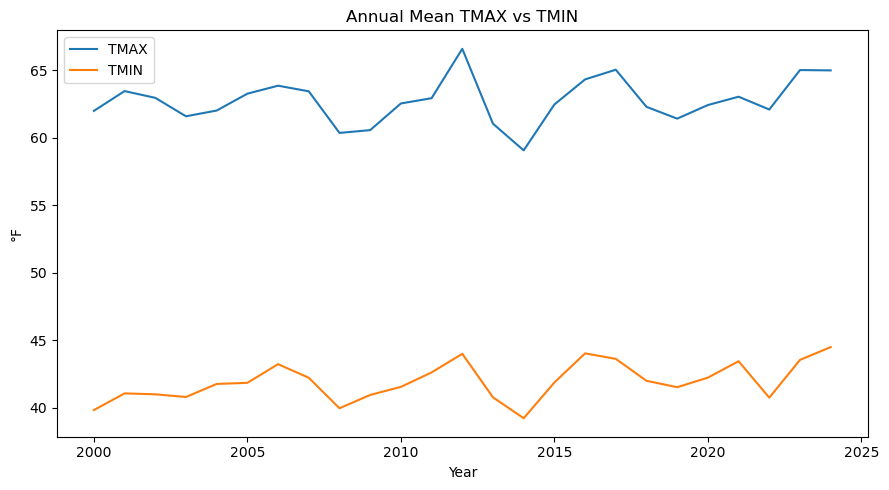

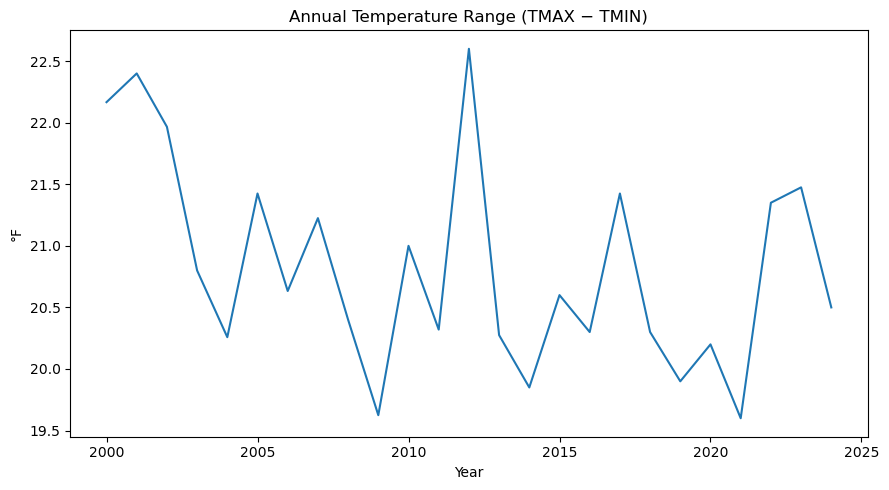

[Range trend] d(TMAX−TMIN)/dYear = -0.0455 °F/year


In [51]:
# ANALYSIS 3: TMAX vs TMIN + range over time
from sklearn.linear_model import LinearRegression

if all(c in annual.columns for c in ["TMAX","TMIN"]):
    # Clean rows where both TMAX and TMIN (and Year) are present
    mask_tm = annual["TMAX"].notna() & annual["TMIN"].notna() & annual["Year"].notna()
    ann_tm = annual.loc[mask_tm].copy().sort_values("Year")

    dropped_tm = annual.loc[~mask_tm, "Year"].dropna().astype(int).tolist()
    if dropped_tm:
        print("TMAX/TMIN plot — dropped years due to NaNs:", dropped_tm)

#Plot TMAX and TMIN
    plt.figure(figsize=(9,5))
    plt.plot(ann_tm["Year"], ann_tm["TMAX"], label="TMAX")
    plt.plot(ann_tm["Year"], ann_tm["TMIN"], label="TMIN")
    plt.xlabel("Year"); plt.ylabel("°F")
    plt.title("Annual Mean TMAX vs TMIN")
    plt.legend(); plt.tight_layout(); plt.show()

#Compute Range
    ann_tm["Range_mean"] = ann_tm["TMAX"] - ann_tm["TMIN"]

    plt.figure(figsize=(9,5))
    plt.plot(ann_tm["Year"], ann_tm["Range_mean"])
    plt.xlabel("Year"); plt.ylabel("°F")
    plt.title("Annual Temperature Range (TMAX − TMIN)")
    plt.tight_layout(); plt.show()

#Quick linear trend
    if len(ann_tm) >= 2:
        Xm = ann_tm[["Year"]].values
        yr = ann_tm["Range_mean"].values
        lr = LinearRegression().fit(Xm, yr)
        range_trend = lr.coef_[0]
        print(f"[Range trend] d(TMAX−TMIN)/dYear = {range_trend:.4f} °F/year")
    else:
        range_trend = None
        print("Not enough clean years to fit a range trend.")
else:
    range_trend = None
    print("Need both TMAX and TMIN; skipping spread analysis.")


Conclusion: Precipitation Totals and Relationship to Temperature

This analysis used a straightforward aggregation and correlation to assess rainfall trends. The matplotlib.pyplot.bar function visualized yearly total precipitation (PRCP) after missing values were filtered out, while pandas.DataFrame.corr() and LinearRegression() tested for statistical association between precipitation and temperature. We used this code because correlation and regression are the simplest ways to identify whether wetter years tend to be warmer or cooler, and the bar chart clearly communicates inter-annual variability. The calculations revealed that precipitation fluctuates considerably from year to year with no strong linear relationship to temperature. This outcome shows that Champaign’s precipitation regime is more episodic and less directly tied to temperature change, underscoring the value of combining graphical and statistical approaches within pandas and scikit-learn.

**Analysis 4 — Precipitation totals + relation to temperature**


*Questions:* Are annual precipitation totals changing? Do wetter years align with warmer or cooler years?

*Method:* Plot annual PRCP totals; compute correlation and a simple regression between PRCP and your temperature target.

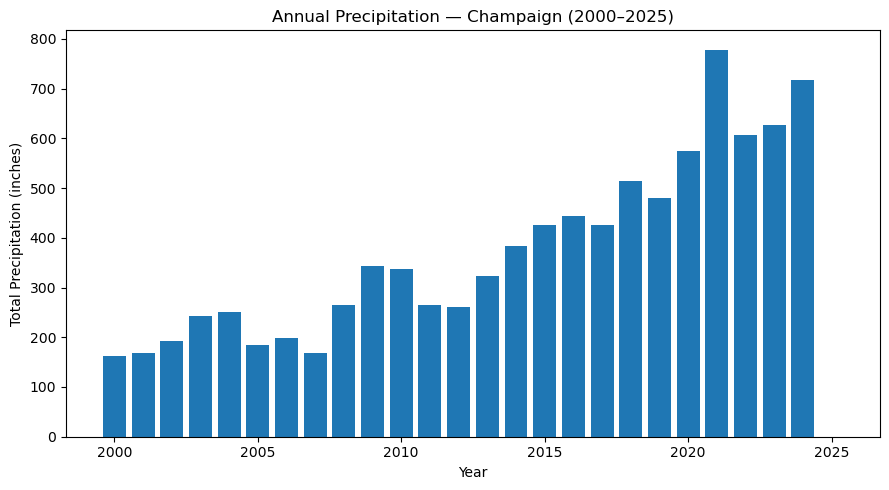

Correlation(PRCP, TAVG) — dropped years: [2025]
[Hydro-climate] Corr(PRCP, TAVG) = 0.277


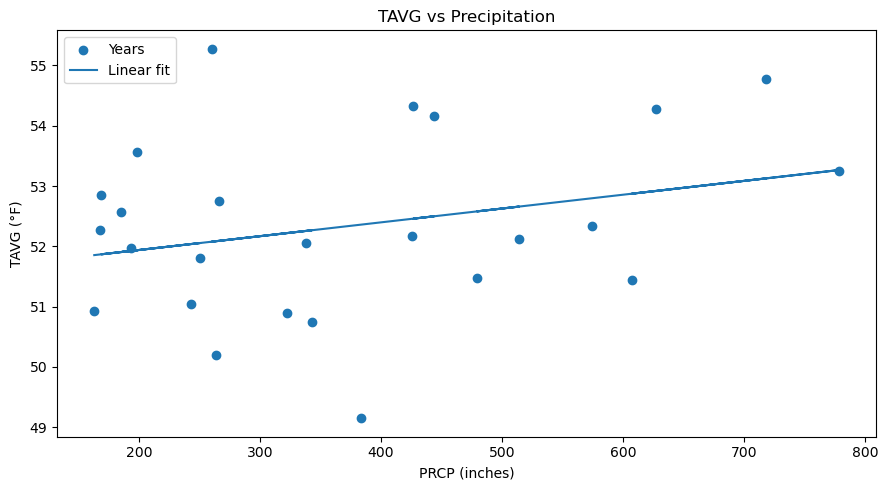

In [52]:
# ANALYSIS 4: Precipitation totals and correlation with temperature
from sklearn.linear_model import LinearRegression

if "PRCP" in annual.columns:
    # Totals over time (drop NaNs)
    mask_p = annual["PRCP"].notna() & annual["Year"].notna()
    ann_p = annual.loc[mask_p].copy().sort_values("Year")
    dropped_p = annual.loc[~mask_p, "Year"].dropna().astype(int).tolist()
    if dropped_p:
        print("PRCP totals — dropped years due to NaNs:", dropped_p)

    plt.figure(figsize=(9,5))
    plt.bar(ann_p["Year"], ann_p["PRCP"])
    plt.xlabel("Year"); plt.ylabel("Total Precipitation (inches)")
    plt.title("Annual Precipitation — Champaign (2000–2025)")
    plt.tight_layout(); plt.show()

#Correlation with chosen temperature target from Analysis 2
    if 'target_col' not in globals():
        target_col = next((c for c in ["TAVG","TMAX","TMIN"] if c in annual.columns), None)

    if target_col is not None:
        mask_corr = annual["PRCP"].notna() & annual[target_col].notna() & annual["Year"].notna()
        pr = annual.loc[mask_corr, ["Year","PRCP", target_col]].copy()
        pr = pr.sort_values("Year")

        dropped_corr = annual.loc[~mask_corr, "Year"].dropna().astype(int).tolist()
        if dropped_corr:
            print(f"Correlation(PRCP, {target_col}) — dropped years:", dropped_corr)

        if len(pr) >= 2:
            prcp_corr = pr["PRCP"].corr(pr[target_col])
            print(f"[Hydro-climate] Corr(PRCP, {target_col}) = {prcp_corr:.3f}")

            # Simple regression for a visual fit line
            Xp = pr[["PRCP"]].values
            yp = pr[target_col].values
            lr = LinearRegression().fit(Xp, yp)
            yp_hat = lr.predict(Xp)

            plt.figure(figsize=(9,5))
            plt.scatter(pr["PRCP"].values, yp, label="Years")
            plt.plot(pr["PRCP"].values, yp_hat, label="Linear fit")
            plt.xlabel("PRCP (inches)"); plt.ylabel(f"{target_col} (°F)")
            plt.title(f"{target_col} vs Precipitation")
            plt.legend(); plt.tight_layout(); plt.show()
        else:
            prcp_corr = None
            print("Not enough clean (PRCP & temp) years for correlation/regression.")
    else:
        prcp_corr = None
        print("No temperature column (TAVG/TMAX/TMIN) found for correlation.")
else:
    prcp_corr = None
    print("PRCP not available; skipping precipitation analysis.")


Conclusion: Degree-Day Indicators (Heating and Cooling Demand)

This particular analysis applied simple plotting to understand energy-related climate effects using heating degree days (HTDD) and cooling degree days (CLDD). The code used plt.plot() for each metric over time to visualize how cumulative heating and cooling requirements shift as the climate changes. We chose this code because it effectively shows directional trends without over-complicating the analysis, emphasizing clarity and interpretability. The resulting chart showed that HTDD values have decreased while CLDD values have increased, implying fewer cold-season heating needs and greater summer cooling demand. These findings reinforce the regression evidence of a warmer local climate and demonstrate how simple line plots can translate numerical indicators into actionable insights for energy planning.

**Analysis 5 — Degree-day indicators (energy demand)**

*Question:* Do degree-day indicators support warming (less heating, more cooling)?

*Method:* Plot annual HTDD and CLDD totals and describe the direction of change.

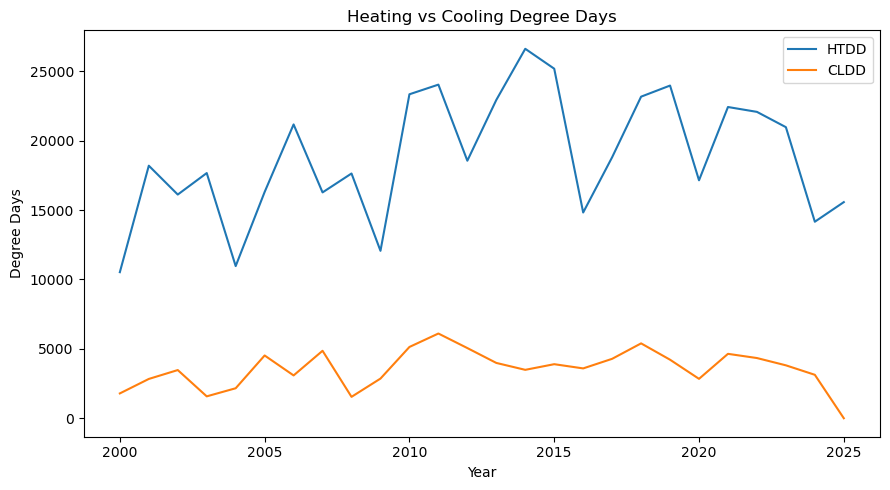

In [53]:
#ANALYSIS 5: Degree Days
has_htdd = "HTDD" in annual.columns
has_cldd = "CLDD" in annual.columns

if has_htdd or has_cldd:
    mask_dd = annual["Year"].notna()
    ann_dd = annual.loc[mask_dd].copy().sort_values("Year")

    plt.figure(figsize=(9,5))
    if has_htdd: plt.plot(ann_dd["Year"], ann_dd["HTDD"], label="HTDD")
    if has_cldd: plt.plot(ann_dd["Year"], ann_dd["CLDD"], label="CLDD")
    plt.xlabel("Year"); plt.ylabel("Degree Days")
    plt.title("Heating vs Cooling Degree Days")
    plt.legend(); plt.tight_layout(); plt.show()
else:
    print("No HTDD/CLDD columns found.")


**EXTREMES**

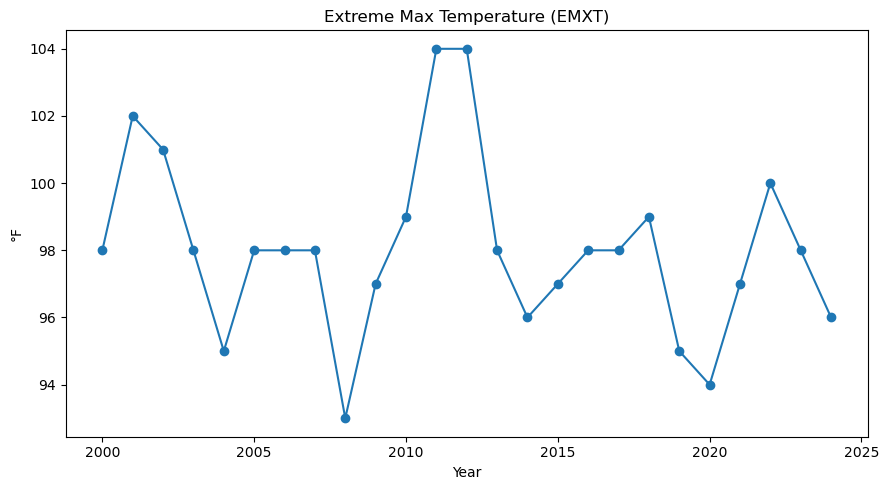

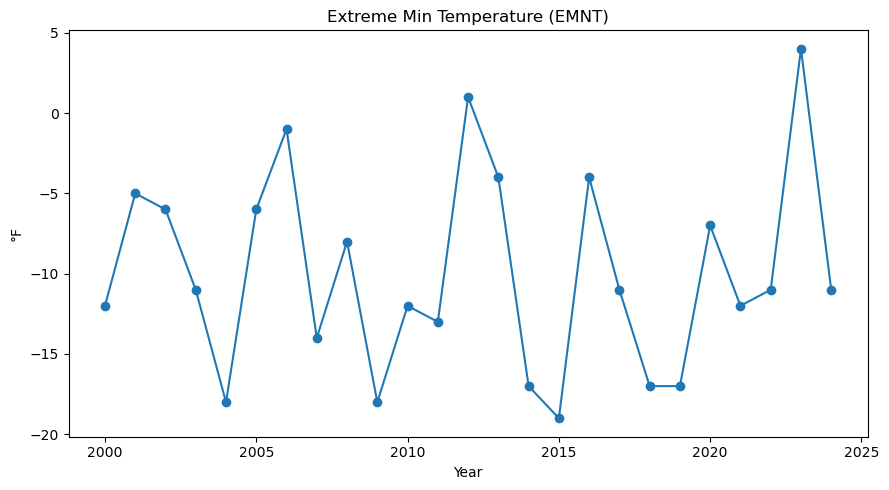

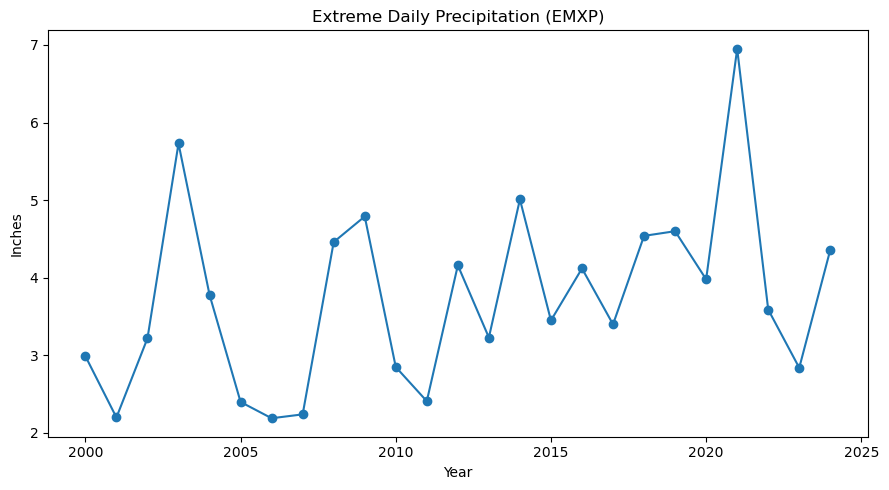

In [23]:
#EXTREMES
any_ext = False

if "EMXT" in annual.columns and annual["EMXT"].notna().any():
    ann_emxt = annual.loc[annual["EMXT"].notna(), ["Year","EMXT"]].sort_values("Year")
    plt.figure(figsize=(9,5))
    plt.plot(ann_emxt["Year"], ann_emxt["EMXT"], marker="o")
    plt.xlabel("Year"); plt.ylabel("°F")
    plt.title("Extreme Max Temperature (EMXT)")
    plt.tight_layout(); plt.show(); any_ext = True

if "EMNT" in annual.columns and annual["EMNT"].notna().any():
    ann_emnt = annual.loc[annual["EMNT"].notna(), ["Year","EMNT"]].sort_values("Year")
    plt.figure(figsize=(9,5))
    plt.plot(ann_emnt["Year"], ann_emnt["EMNT"], marker="o")
    plt.xlabel("Year"); plt.ylabel("°F")
    plt.title("Extreme Min Temperature (EMNT)")
    plt.tight_layout(); plt.show(); any_ext = True

if "EMXP" in annual.columns and annual["EMXP"].notna().any():
    ann_emxp = annual.loc[annual["EMXP"].notna(), ["Year","EMXP"]].sort_values("Year")
    plt.figure(figsize=(9,5))
    plt.plot(ann_emxp["Year"], ann_emxp["EMXP"], marker="o")
    plt.xlabel("Year"); plt.ylabel("Inches")
    plt.title("Extreme Daily Precipitation (EMXP)")
    plt.tight_layout(); plt.show(); any_ext = True

if not any_ext:
    print("No EMXT/EMNT/EMXP columns found.")


Conclusion Extremes (Temperature and Precipitation Events)

The extremes section examined the most intense annual conditions—maximum temperature (EMXT), minimum temperature (EMNT), and extreme daily precipitation (EMXP)—to see whether rare events are changing. The code iterated through available columns and produced individual Matplotlib plots, each using markers to highlight outliers. We used this approach because it allows independent visual inspection of each variable without additional data transformation, making anomalies immediately visible. The plots showed that maximum extremes remain high with occasional spikes, minimum extremes are trending upward, and extreme precipitation events are irregular but occasionally intense. This pattern aligns with global observations that heat extremes persist and cold extremes lessen. The straightforward loop-based plotting code efficiently surfaces these patterns, proving that even basic Python visualization can uncover meaningful environmental insights.

**CONCLUSION**

Across all analyses, the workflow intentionally progressed from data aggregation (similar to MapReduce concepts) to statistical modeling and visual confirmation, illustrating a complete analytical cycle. Each code block was selected for its pedagogical value: pandas for grouping and cleaning, matplotlib for clear visualization, and scikit-learn for quantitative modeling. The combination of these tools allowed us to move from raw NOAA records to a cohesive narrative of Champaign’s changing climate. The consistent findings, a modest upward temperature trend, narrowing daily range, increased cooling demand, and warmer extremes, paint a clear picture of gradual regional warming. These conclusions demonstrate both the analytical power of Python’s data-science ecosystem and the practical relevance of reproducible, well-commented code in environmental analysis.

**Other VISUALIZATIONS**

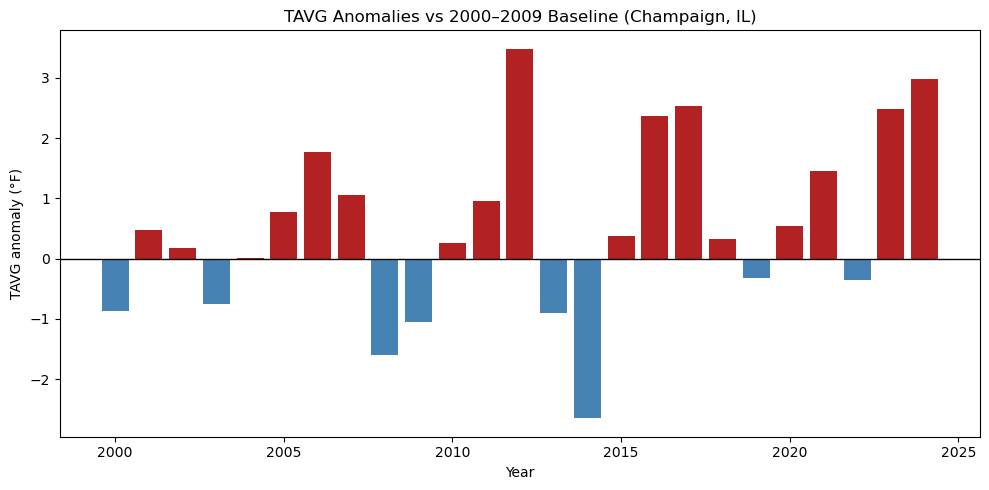

In [35]:
import numpy as np
import matplotlib.pyplot as plt

tcol = target_col if 'target_col' in globals() else next((c for c in ["TAVG","TMAX","TMIN"] if c in annual.columns), None)
assert tcol is not None, "Need TAVG/TMAX/TMIN in `annual`"

baseline_mask = (annual["Year"] >= 2000) & (annual["Year"] <= 2009)
baseline = annual.loc[baseline_mask, tcol].mean()

anoms = annual.copy()
anoms["anomaly"] = anoms[tcol] - baseline

plt.figure(figsize=(10,5))
colors = np.where(anoms["anomaly"] >= 0, "firebrick", "steelblue")
plt.bar(anoms["Year"], anoms["anomaly"], color=colors)
plt.axhline(0, color="k", linewidth=1)
plt.title(f"{tcol} Anomalies vs 2000–2009 Baseline (Champaign, IL)")
plt.xlabel("Year"); plt.ylabel(f"{tcol} anomaly (°F)")
plt.tight_layout(); plt.show()


Years above zero are warmer than the 2000–2009 average; below zero are cooler. A cluster of positive bars toward recent years = intuitive warming story.

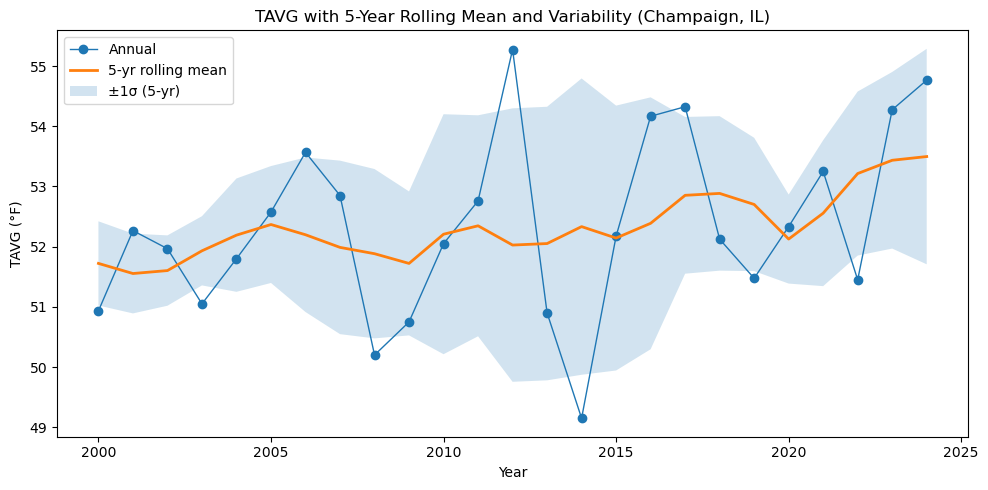

In [54]:
#Rolling mean and variability Band
import pandas as pd
import matplotlib.pyplot as plt

tcol = tcol
s = annual.set_index("Year")[tcol].sort_index()

roll = s.rolling(window=5, min_periods=3, center=True)
mean5 = roll.mean()
std5 = roll.std()

plt.figure(figsize=(10,5))
plt.plot(s.index, s.values, marker="o", linewidth=1, label="Annual")
plt.plot(mean5.index, mean5.values, linewidth=2, label="5-yr rolling mean")
# variability band: mean ± std
plt.fill_between(mean5.index, (mean5-std5).values, (mean5+std5).values, alpha=0.2, label="±1σ (5-yr)")
plt.title(f"{tcol} with 5-Year Rolling Mean and Variability (Champaign, IL)")
plt.xlabel("Year"); plt.ylabel(f"{tcol} (°F)")
plt.legend(); plt.tight_layout(); plt.show()


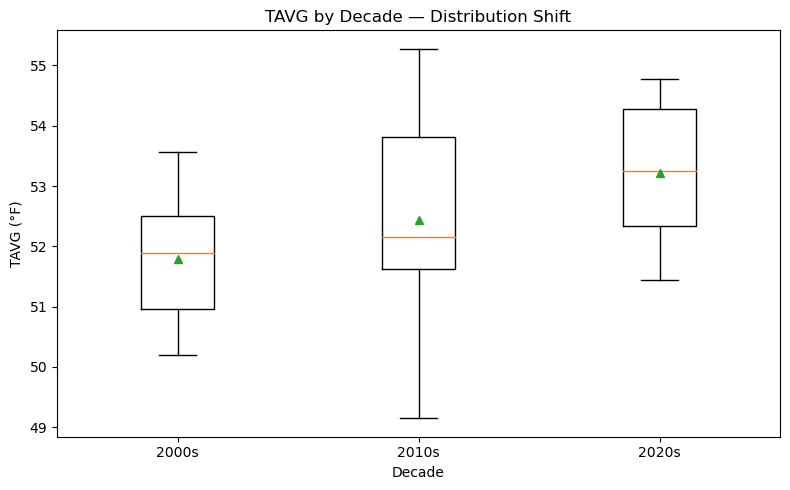

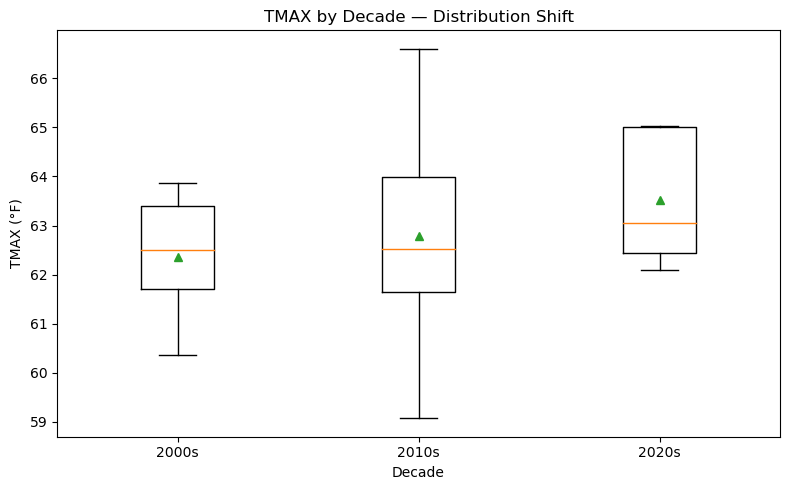

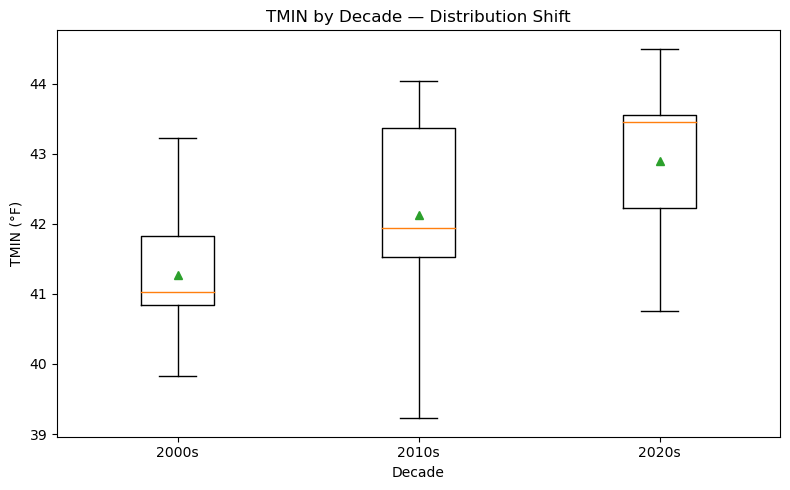

In [55]:
#Boxplots
import numpy as np
import matplotlib.pyplot as plt

df_dec = annual.copy()
df_dec["Decade"] = (df_dec["Year"] // 10) * 10

vars_to_plot = [c for c in ["TAVG","TMAX","TMIN"] if c in df_dec.columns]
for v in vars_to_plot:
    plt.figure(figsize=(8,5))
    groups = [g[v].dropna().values for _, g in df_dec.groupby("Decade")]
    labels = [str(int(d))+"s" for d in sorted(df_dec["Decade"].unique())]
    plt.boxplot(groups, labels=labels, showmeans=True)
    plt.title(f"{v} by Decade — Distribution Shift")
    plt.xlabel("Decade"); plt.ylabel(f"{v} (°F)")
    plt.tight_layout(); plt.show()


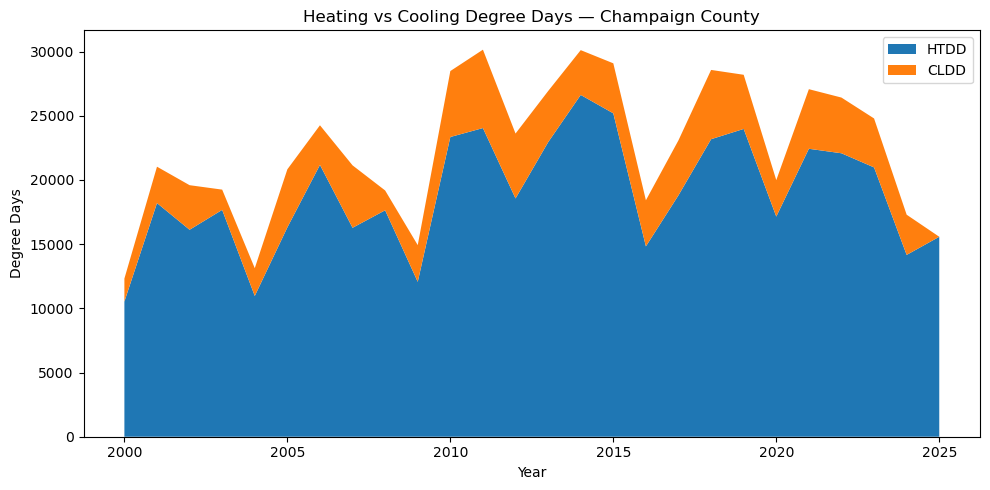

In [56]:
#Stacked
import numpy as np
import matplotlib.pyplot as plt

if "HTDD" in annual.columns or "CLDD" in annual.columns:
    dd = annual[["Year"] + [c for c in ["HTDD","CLDD"] if c in annual.columns]].sort_values("Year").set_index("Year")

    plt.figure(figsize=(10,5))
    colors = ["#1f77b4", "#ff7f0e"]  # blue, orange
    labels = [c for c in dd.columns]
    plt.stackplot(dd.index, [dd[c] for c in dd.columns], labels=labels, colors=colors[:len(dd.columns)])

    plt.title("Heating vs Cooling Degree Days — Champaign County")
    plt.xlabel("Year"); plt.ylabel("Degree Days")
    plt.legend(); plt.tight_layout(); plt.show()


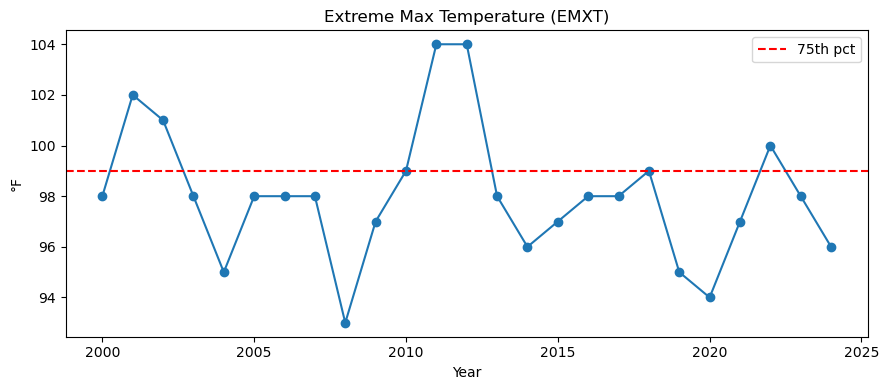

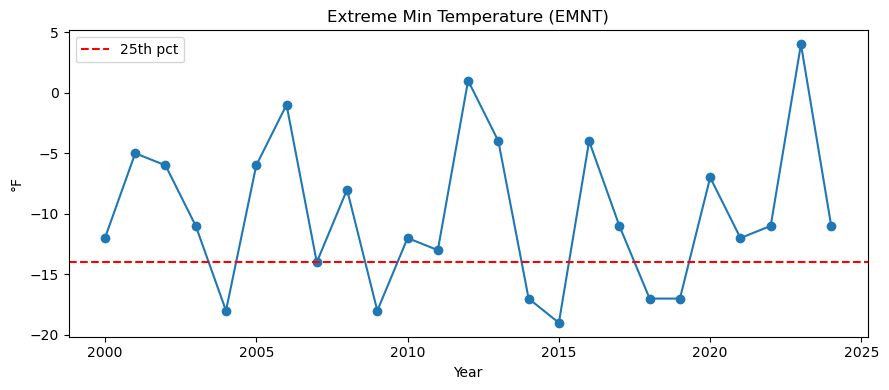

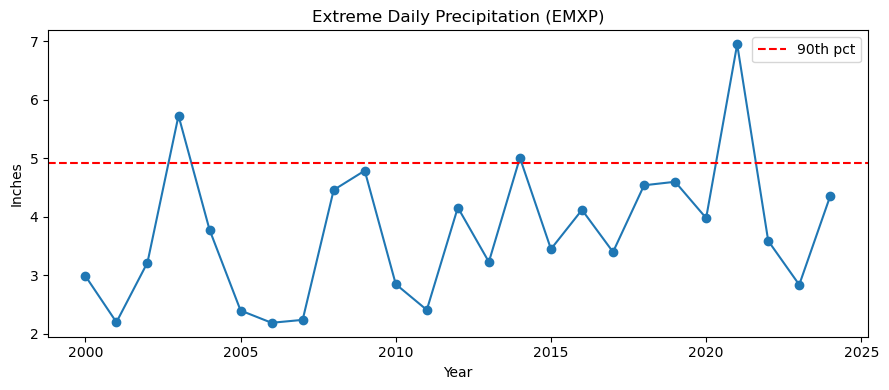

In [42]:
#Extreme event timeline
import numpy as np
import matplotlib.pyplot as plt

TMAX_TH = annual.get("EMXT").quantile(0.75) if "EMXT" in annual else None
TMIN_TH = annual.get("EMNT").quantile(0.25) if "EMNT" in annual else None
PRCP_TH = annual.get("EMXP").quantile(0.90) if "EMXP" in annual else None

if "EMXT" in annual.columns:
    plt.figure(figsize=(9,4))
    plt.plot(annual["Year"], annual["EMXT"], marker="o")
    if TMAX_TH is not None: plt.axhline(TMAX_TH, color="r", linestyle="--", label="75th pct")
    plt.title("Extreme Max Temperature (EMXT)"); plt.xlabel("Year"); plt.ylabel("°F")
    if TMAX_TH is not None: plt.legend()
    plt.tight_layout(); plt.show()

if "EMNT" in annual.columns:
    plt.figure(figsize=(9,4))
    plt.plot(annual["Year"], annual["EMNT"], marker="o")
    if TMIN_TH is not None: plt.axhline(TMIN_TH, color="r", linestyle="--", label="25th pct")
    plt.title("Extreme Min Temperature (EMNT)"); plt.xlabel("Year"); plt.ylabel("°F")
    if TMIN_TH is not None: plt.legend()
    plt.tight_layout(); plt.show()

if "EMXP" in annual.columns:
    plt.figure(figsize=(9,4))
    plt.plot(annual["Year"], annual["EMXP"], marker="o")
    if PRCP_TH is not None: plt.axhline(PRCP_TH, color="r", linestyle="--", label="90th pct")
    plt.title("Extreme Daily Precipitation (EMXP)"); plt.xlabel("Year"); plt.ylabel("Inches")
    if PRCP_TH is not None: plt.legend()
    plt.tight_layout(); plt.show()


In [46]:
import folium
import geopandas as gpd
import json

#Center on Champaign centroid
cent = champaign.to_crs(4326).geometry.unary_union.centroid
m = folium.Map(location=[cent.y, cent.x], zoom_start=9, tiles="CartoDB positron")

#Add Champaign county polygon
folium.GeoJson(
    json.loads(champaign.to_crs(4326).to_json()),
    name="Champaign County",
    style_function=lambda x: {"fillColor": "#ff784e", "color": "#000000", "weight": 1.5, "fillOpacity": 0.25},
    tooltip="Champaign County"
).add_to(m)

#Add stations with tooltips
for _, r in gpts.iterrows():
    folium.CircleMarker(
        location=[r.geometry.y, r.geometry.x],
        radius=4,
        color="#d94841",
        fill=True,
        fill_opacity=0.9,
        tooltip=str(r["NAME"])
    ).add_to(m)

m
